<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Series-temporais-para-previs√£o" data-toc-modified-id="Series-temporais-para-previs√£o-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Series temporais para previs√£o</a></span><ul class="toc-item"><li><span><a href="#Prever-o-proximo-ponto" data-toc-modified-id="Prever-o-proximo-ponto-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Prever o proximo ponto</a></span></li><li><span><a href="#Prever-utilizando-os-ultimos-3-pontos" data-toc-modified-id="Prever-utilizando-os-ultimos-3-pontos-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Prever utilizando os ultimos 3 pontos</a></span></li><li><span><a href="#Estacionariedade" data-toc-modified-id="Estacionariedade-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Estacionariedade</a></span><ul class="toc-item"><li><span><a href="#Testes-subjetivos" data-toc-modified-id="Testes-subjetivos-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Testes subjetivos</a></span></li><li><span><a href="#Teste-ADF" data-toc-modified-id="Teste-ADF-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Teste ADF</a></span><ul class="toc-item"><li><span><a href="#Notas" data-toc-modified-id="Notas-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Notas</a></span></li></ul></li></ul></li><li><span><a href="#Predi√ß√£o" data-toc-modified-id="Predi√ß√£o-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Predi√ß√£o</a></span><ul class="toc-item"><li><span><a href="#Metodo-de-suaviza√ß√£o-exponencial" data-toc-modified-id="Metodo-de-suaviza√ß√£o-exponencial-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Metodo de suaviza√ß√£o exponencial</a></span></li><li><span><a href="#Holt-winters" data-toc-modified-id="Holt-winters-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Holt winters</a></span></li></ul></li></ul></li><li><span><a href="#Autocorrela√ß√£o" data-toc-modified-id="Autocorrela√ß√£o-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Autocorrela√ß√£o</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Autocorrelacoa-parcial" data-toc-modified-id="Autocorrelacoa-parcial-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Autocorrelacoa parcial</a></span><ul class="toc-item"><li><span><a href="#Notas" data-toc-modified-id="Notas-2.0.1.1"><span class="toc-item-num">2.0.1.1&nbsp;&nbsp;</span>Notas</a></span></li></ul></li></ul></li><li><span><a href="#Modelos-autorregressivos" data-toc-modified-id="Modelos-autorregressivos-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Modelos autorregressivos</a></span></li></ul></li><li><span><a href="#Medida-de-Performancemm" data-toc-modified-id="Medida-de-Performancemm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Medida de Performancemm</a></span></li></ul></div>

# Series temporais para previs√£o

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
co2 = pd.read_csv('timeseries-aula1/co2.csv', sep='\t')

In [4]:
co2.head()

data   media
0  1980.042  338.45
1  1980.125  339.15
2  1980.208  339.48
3  1980.292  339.87
4  1980.375  340.30

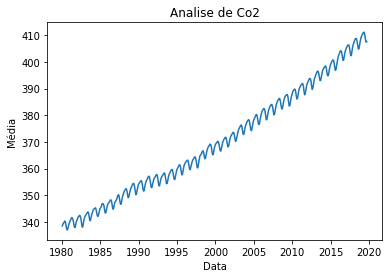

In [5]:
ax = plt.plot(co2['data'], co2['media'])
plt.title('Analise de Co2')
plt.xlabel('Data')
plt.ylabel('M√©dia')

ax = ax

In [6]:
nasc = pd.read_csv('timeseries-aula1/nascimentos.csv')

In [7]:
nasc.head()

data  n_nasc
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44

In [8]:
# df2.plot()
nasc.data = pd.to_datetime(nasc.data)



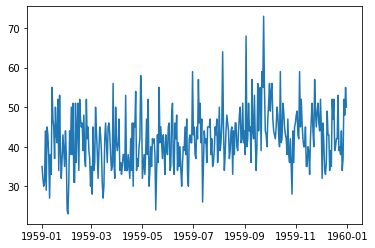

In [9]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot(nasc['data'], nasc['n_nasc'])

## Prever o proximo ponto

In [10]:
media_carb = np.mean(co2.media)

In [11]:
df_carb = co2['data'][1] - co2['data'][0]

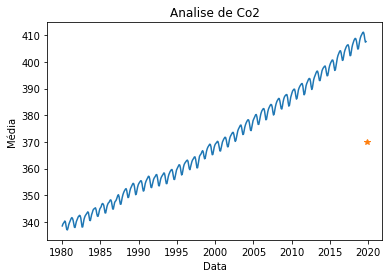

In [12]:
ax = plt.plot(co2['data'], co2['media'])
plt.plot(co2.iloc[-1,0]+df_carb, media_carb,"*") #plotando a media do co2
plt.title('Analise de Co2')
plt.xlabel('Data')
plt.ylabel('M√©dia')

ax = ax

In [13]:
media_nasc = np.mean(nasc['n_nasc'])

In [14]:
dt_nasc = nasc['data'][1] - nasc['data'][0] # intervalo de tempo

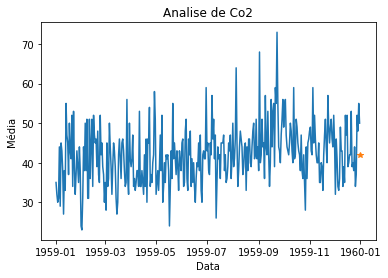

In [15]:
ax = plt.plot(nasc['data'], nasc['n_nasc'])
plt.plot(nasc.iloc[-1,0]+dt_nasc, media_nasc,"*") #plotando a media do co2
plt.title('Analise de Co2')
plt.xlabel('Data')
plt.ylabel('M√©dia')

ax = ax

In [16]:
# estimar a media dos ultimos 3 pontos 
co2.shape

media_tres_ult_pts = np.mean(co2['media'][474:476])
media_tres_ult_pts

408.06

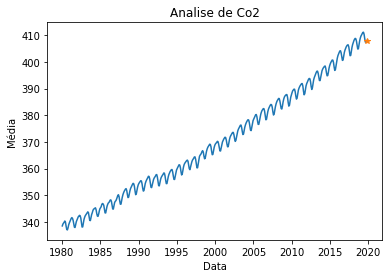

In [17]:
ax = plt.plot(co2['data'], co2['media'])
plt.plot(co2.iloc[-1,0]+df_carb, media_tres_ult_pts,"*") #plotando a media do co2
plt.title('Analise de Co2')
plt.xlabel('Data')
plt.ylabel('M√©dia')

ax = ax

## Prever utilizando os ultimos 3 pontos

In [18]:
# estimar a media dos ultimos 3 pontos 
nasc.shape

media_tres_ult_pts = np.mean(nasc['n_nasc'][362:364])
media_tres_ult_pts

51.5

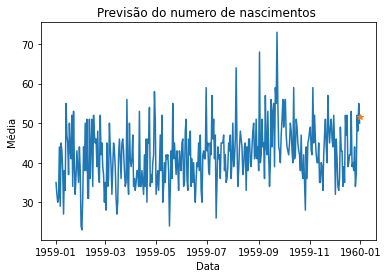

In [19]:
ax = plt.plot(nasc['data'], nasc['n_nasc'])
plt.plot(nasc.iloc[-1,0]+dt_nasc, media_tres_ult_pts,"*") #plotando a media do co2
plt.title('Previs√£o do numero de nascimentos ')
plt.xlabel('Data')
plt.ylabel('M√©dia')

ax = ax

In [20]:
media_model_c =  co2.rolling(50).mean()

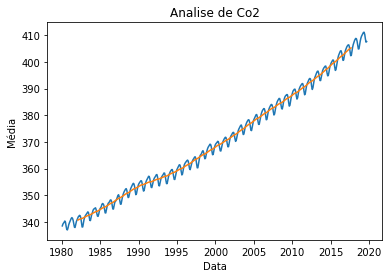

In [21]:
ax = plt.plot(co2['data'], co2['media'])
ax = plt.plot(media_model_c['data'], media_model_c['media'])

plt.title('Analise de Co2')
plt.xlabel('Data')
plt.ylabel('M√©dia')

ax = ax

In [22]:
media_model_n =  nasc.rolling(5).mean()

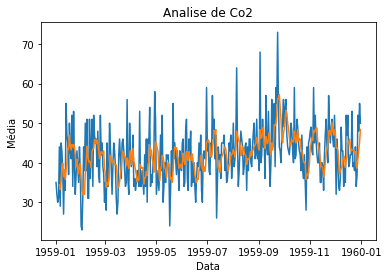

In [23]:
ax = plt.plot(nasc['data'], nasc['n_nasc'])
ax = plt.plot(nasc['data'], media_model_n['n_nasc'])

plt.title('Analise de Co2')
plt.xlabel('Data')
plt.ylabel('M√©dia')

ax = ax

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
result_c = seasonal_decompose(co2.set_index('data'), period=10)

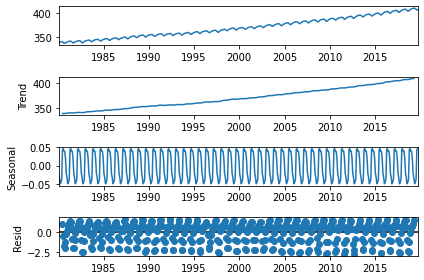

In [26]:
result_c.plot();

In [27]:
result_n = seasonal_decompose(nasc.set_index('data'), period=35)

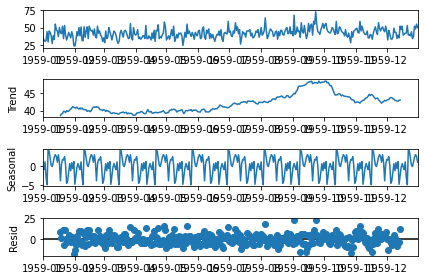

In [28]:
result_n.plot();

* n√£o tem sazonalidade mas tem tendencia

## Estacionariedade

### Testes subjetivos

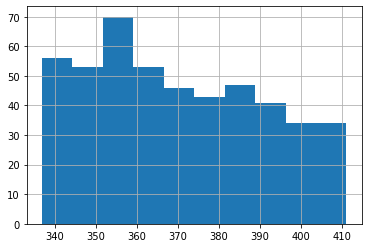

In [29]:
# verifica estacionariedade - forma de uma gaussiana 
co2.media.hist()

* uma serie estacionaria parece uma gaussiana

In [30]:
divide = int(len(co2)/2)

In [31]:
x =co2.media.values

In [32]:
c1, c2  = x[0:divide], x[divide:]

In [33]:
# indicativos de n√£o estacionariedade - medias diferentes
print('c1 media', c1.mean())
print('c2 media', c2.mean())
print('c1 var', c1.var())
print('c2 var', c2.var())


c1 media 352.31550420168065
c2 media 387.816359832636
c1 var 73.90219533401597
c2 var 151.542490933282


* outra forma de verificar eh dividir a serie em algumas partes e verificar os valores de media, se os valores de media variam  temos um indicativo de nao estacionariedade.Outro indicativo √© a variancia, valor alto de variancia indica nao estacionariedade

In [34]:
divide = int(len(nasc)/2)

In [35]:
x =nasc.n_nasc.values

In [36]:
c1, c2  = x[0:divide], x[divide:]

In [37]:
# indicativos de n√£o estacionariedade - medias parecidas
print('c1 media', c1.mean())
print('c2 media', c2.mean())
print('c1 var', c1.var())
print('c2 var', c2.var())


c1 media 39.76373626373626
c2 media 44.185792349726775
c1 var 49.21341021615746
c2 var 48.708650601690096


* Pequena variacao na media e pequena varia√ß√£o na varia√ß√£o. Indicativos de estacionariedade na base de nasc.

### Teste ADF

In [38]:
from statsmodels.tsa.stattools import adfuller

In [39]:
resultados_c = adfuller(co2.media.values)

In [40]:
print('ADF', resultados_c[0])  # mais negativo mais indicativo de estacionariedade
print('p-value %f', resultados_c[1])

ADF 3.0368288291669945
p-value %f 1.0


In [41]:
resultados_n = adfuller(nasc.n_nasc.values)

In [42]:
print('ADF', resultados_n[0])  # mais negativo mais indicativo de estacionariedade
print('p-value %f', resultados_n[1])

ADF -4.808291253559761
p-value %f 5.243412990149905e-05


#### Notas

* Para que possamos fazer previs√µes em s√©ries temporais, precisaremos garantir que elas sejam estacion√°rias.Caso contr√°rio, ser√° necess√°rio levarmos em considera√ß√£o caracter√≠sticas da s√©rie temporal que a tornam n√£o-estacion√°ria, no momento de previs√£o.

* A diferencia√ß√£o √© uma transforma√ß√£o que pode ser aplicada para remover a depend√™ncia temporal dos dados, tornando a s√©rie estacion√°ria.

* A diferencia√ß√£o √© aplicada atrav√©s da subtra√ß√£o de uma amostra atual dos dados por uma amostra anterior:
    * diferenca(t) = serie(t) - serie(t-1)
* Esta transforma√ß√£o deve ser revertida ap√≥s a previs√£o para a obten√ß√£o dos valores corretos.
    * serie_recuperada = diferenca(t) + serie(t-1)


In [43]:
serie_diferenciada = nasc['n_nasc'].diff()


Text(0.5, 0, 'Data')

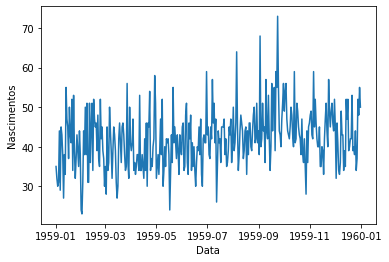

In [44]:
# serie temporal original
plt.plot(nasc['data'],nasc['n_nasc'])
plt.ylabel('Nascimentos')
plt.xlabel('Data')

Text(0.5, 0, 'Data')

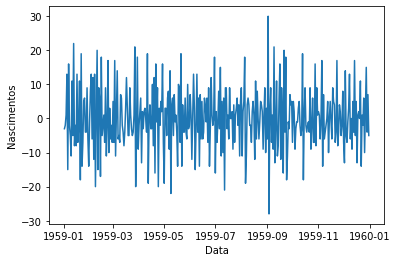

In [45]:
# a figura da s√©rie ap√≥s a diferencia√ß√£o pode ser obtida por: ( tendencia removida)
plt.plot(nasc ['data'],serie_diferenciada)
plt.ylabel('Nascimentos')
plt.xlabel('Data')


## Predi√ß√£o

### Metodo de suaviza√ß√£o exponencial

In [46]:
co2 = co2.set_index('data')

In [47]:
co2_train = co2[1980.042:2015]

In [48]:
co2_test = co2[2015:]

In [49]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [50]:
model_adj = SimpleExpSmoothing(co2_train).fit(smoothing_level=0.5)

/home/walkira/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [51]:
co2_test.shape

(57, 1)

In [52]:
model_prev = model_adj.forecast(57)

/home/walkira/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


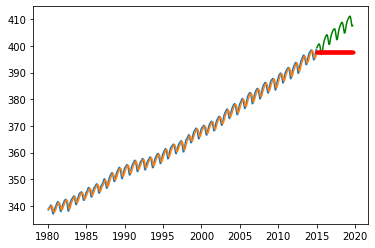

In [53]:
plt.plot(co2_train)
plt.plot(co2_train.index, model_adj.fittedvalues.values)
plt.plot(co2_test, 'g')
plt.plot(co2_test.index,model_prev, 'r.' )

In [91]:
#nasc = nasc.set_index('data')
nasc_treino = nasc['1959-01-01':'1959-12-01']
nasc_teste = nasc['1959-12-01':]

model_adj = SimpleExpSmoothing(nasc_treino).fit(smoothing_level=0.5)

model_prev_suave =  model_adj.forecast(31)

/home/walkira/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


* estimativa baseada na media e na suaviza√ß√£o dos pontos

### Holt winters

* tbm de suaviza√ß√£o exponencial, mas de 3 ordem; 
* modelo aditivo, 
* modelo multiplicativo

* estima a cada ponto e atualiza a tendencia (alfa)
* holtwinters: usa nivel, tendencia e sazonalidade 
* o holtwinters pergunta se a sazonalidade eh aditiva ou multiplicativa


In [55]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [66]:
modelo_ajustado = ExponentialSmoothing(co2_train.values, trend='additive', 
                     seasonal='additive', seasonal_periods=35).fit()

/home/walkira/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [67]:
co2.shape

(477, 1)

In [68]:
co2_test.shape

(57, 1)

In [69]:
modelo_prev = modelo_ajustado.predict(start=420, end =476)

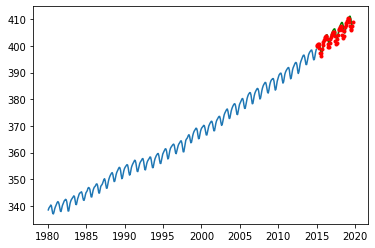

In [72]:
plt.plot(co2_train)
plt.plot(co2_test,'g')
plt.plot(co2_test.index,modelo_prev, 'r.')
         

# Autocorrela√ß√£o 

* forma de verificar de sazonalidade: autocorrelacao 


In [73]:
from statsmodels.graphics.tsaplots import plot_acf

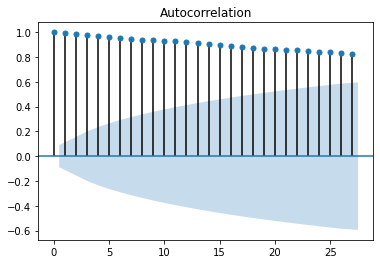

In [74]:
plot_acf(co2);

*  Os valores mais altos da autocorrela√ß√£o indicam que existem partes semelhantes na s√©rie temporal por diversos atrasos.
* parte azul regi√£o de confian√ßa 
* valores acima da regi√£o azul temos mais confian√ßa de que est√£o relacionados a sazonalidade

### Autocorrelacoa parcial

In [76]:
from statsmodels.graphics.tsaplots import plot_pacf

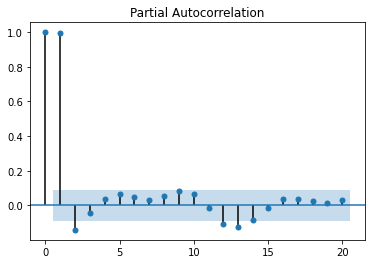

In [78]:
plot_pacf(co2,lags=20);

* temos infos de correlacao

#### Notas

 * Temos 3 pontos da s√©rie: {ùë•ùë°
, ùë•ùë°‚àí2, ùë•ùë°‚àí3}, atrav√©s de FAC iremos obter a correla√ß√£o entre
ùë•ùë° ùëí ùë•ùë°‚àí3, por√©m o valor obtido da correla√ß√£o foi influenciado pela correla√ß√£o entre
ùë•ùë°‚àí2 ùëí ùë•ùë°‚àí3. Atrav√©s da FACP isso n√£o acontece, a correla√ß√£o entre ùë•ùë°‚àí1 ùëí ùë•ùë°‚àí3 n√£o √©
influenciada por a correla√ß√£o entre ùë•ùë°‚àí2 ùëí ùë•ùë°‚àí3

## Modelos autorregressivos

* parece uma regressao linear comum, mas nao usa minimos quadrados, usa maxima verossimilhan√ßa;


In [80]:
from statsmodels.tsa.ar_model import AutoReg

In [82]:
lista = np.linspace(1, 40,40)

In [92]:
modelo_ajustado = AutoReg(co2_train.values, lags=lista, trend='c', seasonal=True, period=30).fit()

In [93]:
modelo_previsto = modelo_ajustado.predict(start =420, end=476 )

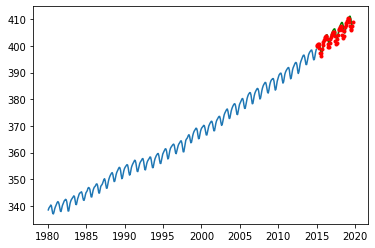

In [85]:
plt.plot(co2_train)
plt.plot(co2_test,'g')
plt.plot(co2_test.index,modelo_prev, 'r.')

In [94]:
modelo_ajustado = AutoReg(nasc_treino.values, lags=lista, trend='c', seasonal=True, period=35).fit()
modelo_previsto_ar = modelo_ajustado.predict(start=335,end=365)

# Medida de Performancemm

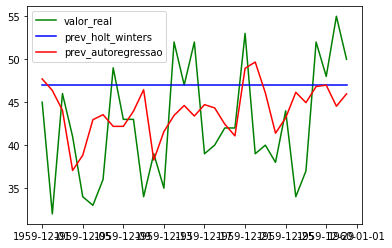

In [100]:
plt.plot(nasc_teste, 'g',label='valor_real')
plt.plot(nasc_teste.index, model_prev_suave,  'b-',label='prev_holt_winters')
plt.plot(nasc_teste.index, modelo_previsto_ar, 'r',label='prev_autoregressao')
plt.legend()


In [102]:
# calculo do erro de previsao 
erro_prev_s = nasc_teste['n_nasc'] - model_prev_suave
erro_prev_ar = nasc_teste['n_nasc'] - modelo_previsto_ar


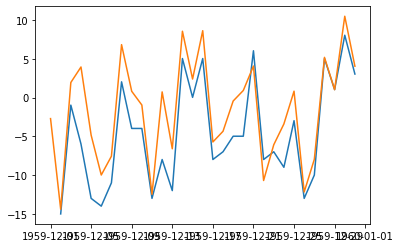

In [103]:
plt.plot(erro_prev_s)
plt.plot(erro_prev_ar)

In [108]:
# erro mais proximo de zero melhor
print(np.mean(np.abs(erro_prev_s)))
print(np.mean(np.abs(erro_prev_ar)))

7.022197566221869
5.496720548092115


In [109]:
# erro negativo ou positivo = quer dizer se to errando para mais ou para menos
print(np.mean(erro_prev_s))   
print(np.mean(erro_prev_ar))

-4.672160582221337
-1.6083080804497984


* erro de previsao media = Com essa medida vamos ter um √∫nico valor que representa uma m√©dia dos erros, que pode ser negativa ou positiva, mostrando se estamos errando para baixo ou para cima.

In [110]:
from sklearn.metrics import mean_absolute_error

In [111]:
mae = mean_absolute_error(nasc_teste['n_nasc'], modelo_previsto_ar)

In [112]:
mae

5.496720548092115

In [113]:
# elevar ao quadrado - enfatiza o erro - deixa os erros maiores
from sklearn.metrics import mean_squared_error

In [114]:
mean_squared_error(nasc_teste['n_nasc'], modelo_previsto_ar)

45.437394221812596

In [115]:
mean_squared_error(nasc_teste['n_nasc'], model_prev_suave)

63.7761920175469

In [ ]:
# 